# Lecture 16 The Covid-19 Pandemic

The COVID-19 outbreak is an unprecedented global public health challenge. In order for governments, organizations and individuals to respond to it effectively, it will be vital that they have easy access to good, clear data and a good understanding of what can and can not be said based on the available data.

## Data Sources:

**List of Available Data Sources**:
- World Health Organization (WHO): https://www.who.int/
- DXY.cn. Pneumonia. 2020. http://3g.dxy.cn/newh5/view/pneumonia.
- BNO News: https://bnonews.com/index.php/2020/02/the-latest-coronavirus-cases/
- National Health Commission of the People’s Republic of China (NHC): http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
- China CDC (CCDC): http://weekly.chinacdc.cn/news/TrackingtheEpidemic.htm
- Hong Kong Department of Health: https://www.chp.gov.hk/en/features/102465.html
- Macau Government: https://www.ssm.gov.mo/portal/
- Taiwan CDC: https://sites.google.com/cdc.gov.tw/2019ncov/taiwan?authuser=0
- US CDC: https://www.cdc.gov/coronavirus/2019-ncov/index.html
- Government of Canada: https://www.canada.ca/en/public-health/services/diseases/coronavirus.html
- Australia Government Department of Health: https://www.health.gov.au/news/coronavirus-update-at-a-glance
- European Centre for Disease Prevention and Control (ECDC): https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases
- Ministry of Health Singapore (MOH): https://www.moh.gov.sg/covid-19
- Italy Ministry of Health: http://www.salute.gov.it/nuovocoronavirus
- 1Point3Arces: https://coronavirus.1point3acres.com/en
- WorldoMeters: https://www.worldometers.info/coronavirus/
- Berliner Morgenpost: https://interaktiv.morgenpost.de/corona-virus-karte-infektionen-deutschland-weltweit/


## 1. Plot the cases in as a function of time

### First of all, prepare the data for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

fn = '../Datasets/total-and-daily-cases-covid-19.csv' # file name
df = pd.read_csv(fn) # load file into data frame
df.head() # show the first 10 rows

,Entity,Code,Date,Total confirmed cases (cases),Daily new confirmed cases (cases)
0,Afghanistan,AFG,"Dec 31, 2019",0,0
1,Afghanistan,AFG,"Jan 1, 2020",0,0
2,Afghanistan,AFG,"Jan 2, 2020",0,0
3,Afghanistan,AFG,"Jan 3, 2020",0,0
4,Afghanistan,AFG,"Jan 4, 2020",0,0


In [2]:
# first change the column names slightly
df.rename(columns={'Total confirmed cases (cases)':'TotalCases',\
                   'Daily new confirmed cases (cases)':'DailyCases'},\
                    inplace=True)
df.head()

,Entity,Code,Date,TotalCases,DailyCases
0,Afghanistan,AFG,"Dec 31, 2019",0,0
1,Afghanistan,AFG,"Jan 1, 2020",0,0
2,Afghanistan,AFG,"Jan 2, 2020",0,0
3,Afghanistan,AFG,"Jan 3, 2020",0,0
4,Afghanistan,AFG,"Jan 4, 2020",0,0


In [3]:
import time
from datetime import datetime,timedelta

# now let's convert the date strings to datetime object by adding a new column 'DT' 
df['DT']=pd.to_datetime(df.Date)
df.head()

,Entity,Code,Date,TotalCases,DailyCases,DT
0,Afghanistan,AFG,"Dec 31, 2019",0,0,2019-12-31
1,Afghanistan,AFG,"Jan 1, 2020",0,0,2020-01-01
2,Afghanistan,AFG,"Jan 2, 2020",0,0,2020-01-02
3,Afghanistan,AFG,"Jan 3, 2020",0,0,2020-01-03
4,Afghanistan,AFG,"Jan 4, 2020",0,0,2020-01-04


In [4]:
# now let's compute the number of days since 2019-12-31

date = df['DT'] # push the datetime column 'DT' into a series

date_zero = datetime.strptime('2019-12-31','%Y-%m-%d') # starting time

df['days'] = date.map(lambda x : (x - date_zero).days) # compute the delta time

df.head(4)

,Entity,Code,Date,TotalCases,DailyCases,DT,days
0,Afghanistan,AFG,"Dec 31, 2019",0,0,2019-12-31,0
1,Afghanistan,AFG,"Jan 1, 2020",0,0,2020-01-01,1
2,Afghanistan,AFG,"Jan 2, 2020",0,0,2020-01-02,2
3,Afghanistan,AFG,"Jan 3, 2020",0,0,2020-01-03,3


Now we can use the dataframe to do simple data visualization, such as plotting the total cases versus time. Here let's try the .plot() function implemented for a data frame, the syntax goes like=:

DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, 
                sharex=None, sharey=False, layout=None,figsize=None, 
                use_index=True, title=None, grid=None, legend=True, 
                style=None, logx=False, logy=False, loglog=False, 
                xticks=None, yticks=None, xlim=None, ylim=None, rot=None,
                xerr=None,secondary_y=False, sort_columns=False, **kwds)

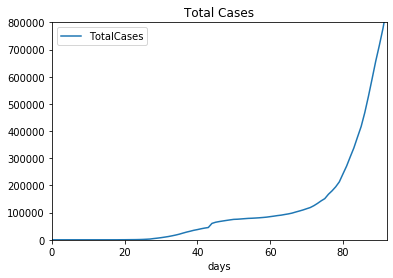

In [5]:
df[df.Entity=='World'].plot('days','TotalCases',\
                            kind='line',title='Total Cases',\
                            ylim=[0,800000],xlim=[0,df.days.max()] )
plt.show()

which is equivilant to using plt.plot() function

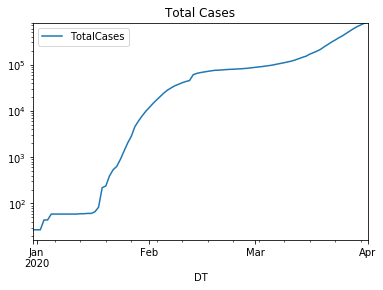

In [6]:
df[df.Entity=='World'].plot('DT','TotalCases',\
                            kind='line',title='Total Cases',\
                            ylim=[0,800000],logy=True )
plt.legend()
plt.show()

or

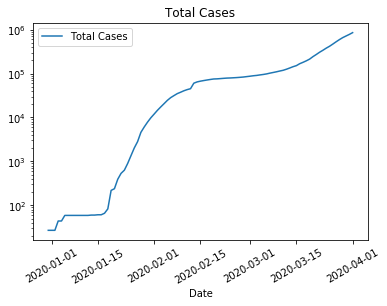

In [7]:
plt.plot(df[df.Entity=='World'].DT,df[df.Entity=='World'].TotalCases,\
         label='Total Cases')
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.title('Total Cases')
plt.yscale('log')
plt.legend()
plt.show()

## 2. More Time Series of the Covid-19 Pandemic

Now let's try generating more time series of the Covid-19 cases using the pandas datafram

In [14]:
df.head()

,Entity,Code,Date,TotalCases,DailyCases,DT,days
0,Afghanistan,AFG,"Dec 31, 2019",0,0,2019-12-31,0
1,Afghanistan,AFG,"Jan 1, 2020",0,0,2020-01-01,1
2,Afghanistan,AFG,"Jan 2, 2020",0,0,2020-01-02,2
3,Afghanistan,AFG,"Jan 3, 2020",0,0,2020-01-03,3
4,Afghanistan,AFG,"Jan 4, 2020",0,0,2020-01-04,4


Note that the column 'Date' is a string series of the date, while the column 'DT' is a "datetime" object of the date, which can be used to generate plots, calculating the time etc. More information about the **datetime** module can be found here: https://docs.python.org/3/library/datetime.html

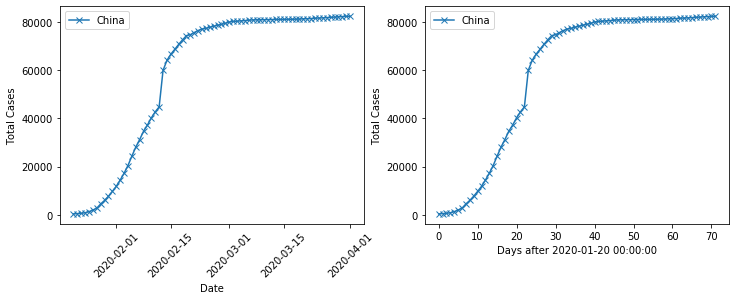

In [15]:
C = 'China' # let's filter the data to only look at the results from China

date_zero = datetime.strptime('2020-1-20','%Y-%m-%d') # starting time, datetime object

df_china = df[(df.Entity==C)&(df.DT>date_zero)] # filter the data to only have China after 2020-1-20

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(df_china['DT'],df_china['TotalCases'],'-x',label=C) # you can use the datetime directly in a line plot
plt.yscale('linear')
plt.xticks(rotation=45) # the rotation option basically tilts the lables 45 degrees so they don't get clustered
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()

plt.subplot(1,2,2)
days = range(df_china['DT'].size)
plt.plot(days,df_china['TotalCases'],'-x',label=C) # you can use the datetime directly in a line plot
plt.yscale('linear')
plt.xticks(rotation=0) # the rotation option basically tilts the lables 45 degrees so they don't get clustered
plt.xlabel('Days after '+ str(date_zero))
plt.ylabel('Total Cases')
plt.legend()
plt.show()

It is clear that the cases reach a saturation state after about 40 days of the onset, say the onset is around Jan-20, 2020. We can also plot the data in a log scale to see the exponential growth of the cases:

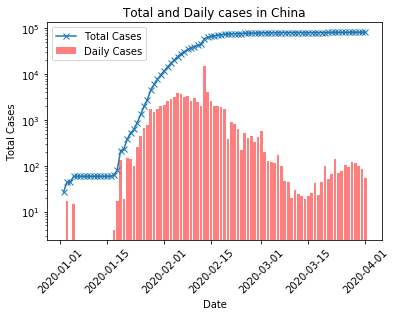

In [16]:
C = 'China' # let's filter the data to only look at the results from China

date_zero = datetime.strptime('2020-1-1','%Y-%m-%d') # starting time, datetime object

df_china = df[(df.Entity==C)&(df.DT>date_zero)] # filter the data to only have China after 2020-1-1

plt.plot(df_china['DT'],df_china['TotalCases'],'-x',label='Total Cases') # you can use the datetime directly in a line plot
plt.bar(df_china['DT'],df_china['DailyCases'],color='r',label='Daily Cases',alpha=0.5) # you can use the datetime directly in a line plot

plt.yscale('log')
plt.xticks(rotation=45) # the rotation option basically tilts the lables 45 degrees so they don't get clustered
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total and Daily cases in China')
plt.legend()
plt.show()

Now let's compare the growth of cases between nations, say we want to look at the following countries:

'China','Italy','United States','Spain','Iran','South Korea','Japan'

let's use a for-loop to show the curves of these countries in the same plot:

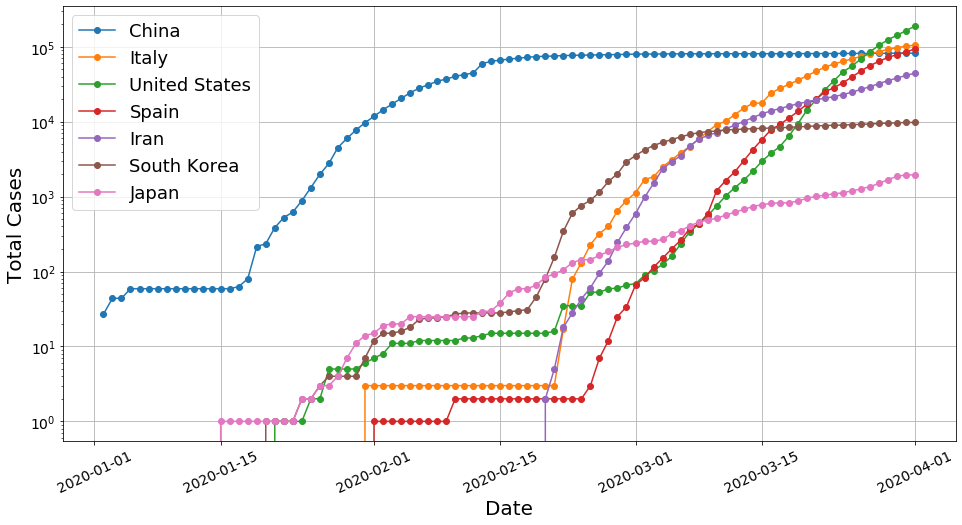

In [17]:
countries = ['China','Italy','United States','Spain','Iran','South Korea','Japan'] # list of interested countries
date_zero = datetime.strptime('2020-1-1','%Y-%m-%d') # starting time, datetime object

plt.figure(figsize=(16,8)) # specify figure size

for C in countries: # step through the list of countries
    
    df_c = df[(df.Entity==C)&(df.DT>date_zero)] # filter the data to only have country C after date_zero

    plt.plot(df_c['DT'],df_c['TotalCases'],'-o',label=C) # plot the data

plt.yscale('log') # change the y scale to be logarithm
plt.xticks(rotation=25,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Cases',fontsize=20)
plt.legend(fontsize=18)
plt.grid()

So the above plot shows the evolution of total confirmed cases in the seven countries we were interested in. It seems like the when the total case is < 100, the curve is quite meaningless since the testing wasn't ready. So let's generate plots for each country only after total case is greater than 100:

,Entity,Code,Date,TotalCases,DailyCases,DT,days
0,Afghanistan,AFG,"Dec 31, 2019",0,0,2019-12-31,0
1,Afghanistan,AFG,"Jan 1, 2020",0,0,2020-01-01,1
2,Afghanistan,AFG,"Jan 2, 2020",0,0,2020-01-02,2
3,Afghanistan,AFG,"Jan 3, 2020",0,0,2020-01-03,3
4,Afghanistan,AFG,"Jan 4, 2020",0,0,2020-01-04,4


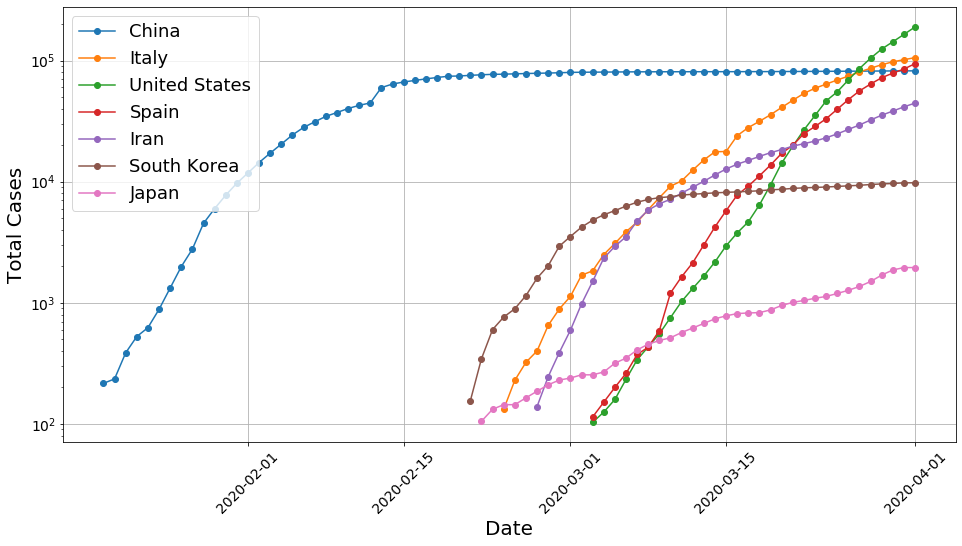

In [18]:
countries = ['China','Italy','United States','Spain','Iran','South Korea','Japan'] # list of interested countries
date_zero = datetime.strptime('2020-1-1','%Y-%m-%d') # starting time, datetime object

plt.figure(figsize=(16,8))

for C in countries: # step through the list of countries
    
    df_c = df[(df.Entity==C)&(df.DT>date_zero)&(df.TotalCases>100)] # filter the data 

    plt.plot(df_c['DT'],df_c['TotalCases'],'-o',label=C) # plot the data

plt.yscale('log')
plt.xticks(rotation=45,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Cases',fontsize=20)
plt.legend(fontsize=18)
plt.grid()
df.head()

Now let's plot all the countries with case > 10000 using a linear scale

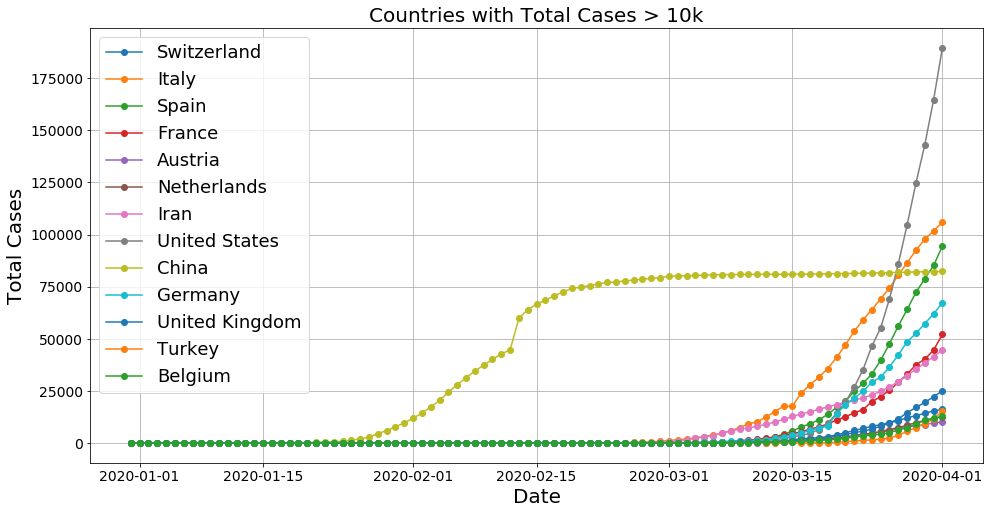

In [19]:
countries = set(df.Entity) # list of all countries - NOTE: set() converts the dt.Entity column to a set
                           # sets are unique, another way to get all the countries is to use np.unique()
date_zero = datetime.strptime('2020-3-30','%Y-%m-%d') # starting time, datetime object

plt.figure(figsize=(16,8))

for C in countries: # step through the list of countries
    
    if ( df[df.Entity==C].TotalCases.max()>10000 )& (C!='World'): # condition: 1. Country C has max cases> 10000
                                                                  #            2. Country C is not 'World'
        df_c = df[(df.Entity==C)] # filter the data 
        plt.plot(df_c['DT'],df_c['TotalCases'],'-o',label=C) # plot the data

plt.yscale('linear')
plt.xticks(rotation=0,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Total Cases',fontsize=20)
plt.title('Countries with Total Cases > 10k',fontsize=20)
plt.legend(fontsize=18)
plt.grid()

## 3. Fit the Pandemic data to functions

Now let's use the curve fitting technique to get a sense of doing "regression" (or predictions). 

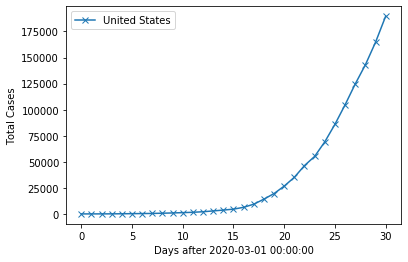

,Entity,Code,Date,TotalCases,DailyCases,DT,days
7877,United States,USA,"Mar 2, 2020",89,20,2020-03-02,62
7878,United States,USA,"Mar 3, 2020",103,14,2020-03-03,63
7879,United States,USA,"Mar 4, 2020",125,22,2020-03-04,64
7880,United States,USA,"Mar 5, 2020",159,34,2020-03-05,65
7881,United States,USA,"Mar 6, 2020",233,74,2020-03-06,66


In [20]:
C = 'United States' # let's filter the data to only look at the results from the US

date_zero = datetime.strptime('2020-3-1','%Y-%m-%d') # starting time, datetime object
df_us = df[(df.Entity==C)&(df.DT>date_zero)] # filter the data frame by Entity and DT

# now let's plot a time series, say the total cases in the US as a function of time
days = np.arange(df_us['DT'].size) 
plt.plot(days,df_us['TotalCases'],'-x',label=C) # you can use the datetime directly in a line plot
plt.yscale('linear')
plt.xlabel('Days after '+ str(date_zero))
plt.ylabel('Total Cases')
plt.legend()
plt.show()

df_us.head()

Let's try a linear, quadratic functions for fitting


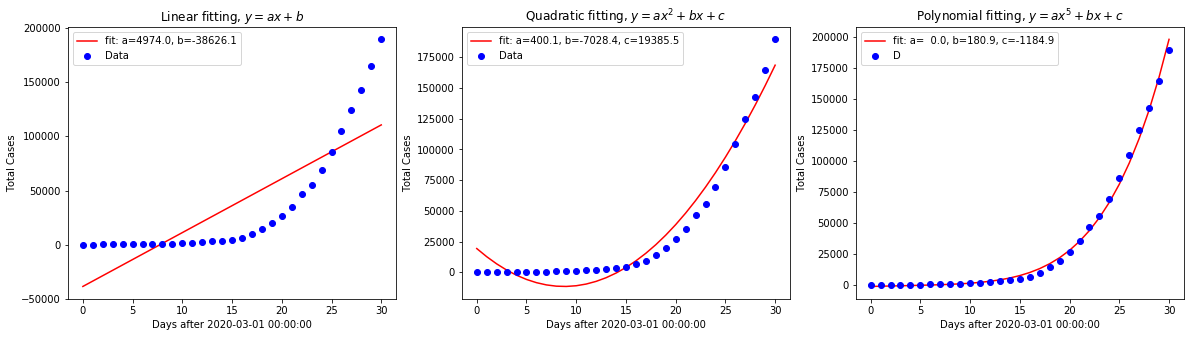

In [21]:
from scipy.optimize import curve_fit # import function curve_fit

# define a linear function
def func_linear(x, a, b):
    return a *x + b

# define a quadratic function
def func_quad(x, a, b, c):
    return a *x**2 + b*x + c

# define a polynomial (say, n=5) function
def func_poly(x, a, b, c):
    return a *x**5 + b*x + c

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
popt, pcov = curve_fit(func_linear, days, df_us['TotalCases']) # curve fitting
plt.plot(days, func_linear(days, *popt), 'r-', label='fit: a=%5.1f, b=%5.1f' % tuple(popt)) # Plot the results
plt.plot(days, df_us['TotalCases'], 'bo', label='Data') # plot the original data
plt.xlabel('Days after '+ str(date_zero))
plt.ylabel('Total Cases')
plt.title('Linear fitting, $y = ax+b$')
plt.legend()

plt.subplot(1,3,2)
popt, pcov = curve_fit(func_quad, days, df_us['TotalCases']) # curve fitting
plt.plot(days, func_quad(days, *popt), 'r-', label='fit: a=%5.1f, b=%5.1f, c=%5.1f' % tuple(popt)) # Plot the results
plt.plot(days, df_us['TotalCases'], 'bo', label='Data') # plot the original data
plt.xlabel('Days after '+ str(date_zero))
plt.ylabel('Total Cases')
plt.title('Quadratic fitting, $y = ax^2+bx+c$')
plt.legend()

plt.subplot(1,3,3)
popt, pcov = curve_fit(func_poly, days, df_us['TotalCases']) # curve fitting
plt.plot(days, func_poly(days, *popt), 'r-', label='fit: a=%5.1f, b=%5.1f, c=%5.1f' % tuple(popt)) # Plot the results
plt.plot(days, df_us['TotalCases'], 'bo', label='D') # plot the original data
plt.xlabel('Days after '+ str(date_zero))
plt.ylabel('Total Cases')
plt.title('Polynomial fitting, $y = ax^5+bx+c$')
plt.legend()

plt.show()

Now we can clearly see that a linear fit does not work well, neither does a quadratic fit (you get negative cases which are phyiscally impossible). It seems like the polynomial fit with $n=5$ works reasonably well for the first 30 days of data since Mar-1-2020. So let's make some quick predictions on the number of cases within the next 10 days and 60 days

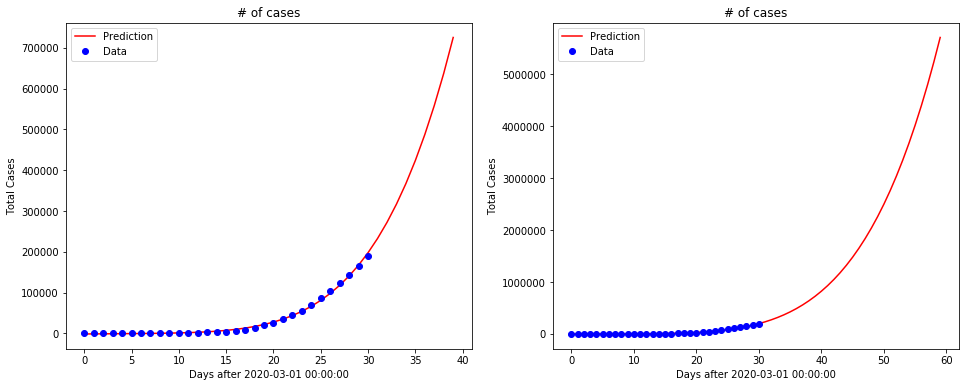

The # of cases after 10 days will be 822363.0
The # of cases after 30 days will be 6208550.0


In [22]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
days_40 = np.arange(40) # array of days from 0 to 40, for predictions
plt.plot(days_40, func_poly(days_40, *popt), 'r-', label='Prediction') # Plot the results
plt.plot(days, df_us['TotalCases'], 'bo', label='Data') # plot the original data
plt.xlabel('Days after '+ str(date_zero))
plt.ylabel('Total Cases')
plt.title('# of cases')
plt.legend()

plt.subplot(1,2,2)
days_60 = np.arange(60) # array of days from 0 to 40, for predictions
plt.plot(days_60, func_poly(days_60, *popt), 'r-', label='Prediction') # Plot the results
plt.plot(days, df_us['TotalCases'], 'bo', label='Data') # plot the original data
plt.xlabel('Days after '+ str(date_zero))
plt.ylabel('Total Cases')
plt.title('# of cases')
plt.legend()
plt.show()

print('The # of cases after 10 days will be', np.round(func_poly(40, *popt)))
print('The # of cases after 30 days will be', np.round(func_poly(60, *popt)))

Based on the polynomial fitting, the # of cases at day 40 (started from Mar-1-2020) will be approximately 88k and after day 60 will be 6.7M! The mathematical curve fitting is very straightforward, but is it reality?

Let's try using the so-called **Logistic function**:

$$f(x,a,b,c)=\frac{c}{1+e^{(x-b)/a}}$$

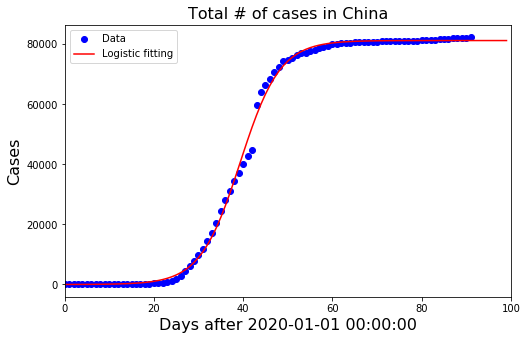

In [24]:
C = 'China'
date_zero = datetime.strptime('2020-1-1','%Y-%m-%d') # starting time, datetime object
df_c = df[(df.Entity==C)&(df.DT>=date_zero)] # filter the China data, after 1-1-2020

# define a logistic function for curve fitting
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

plt.figure(figsize=(8,5))
days = np.arange(df_c['DT'].size) # days is a new array from starting from 0, better for fitting
popt,pcov = curve_fit(logistic_model,days, df_c['TotalCases'],p0=[3.8,40,80000])

plt.plot(days, df_c['TotalCases'], 'bo', label='Data') # plot the original data
days = np.arange(100) 
plt.plot(days,logistic_model(days,*popt),'r',label='Logistic fitting') # plot the fitting 
plt.xlabel('Days after '+ str(date_zero),fontsize=16)
plt.ylabel('Cases',fontsize=16)
plt.title('Total # of cases in '+ C,fontsize=16)
plt.xlim([0,100])
plt.legend()
plt.show()

Estimate the quality of the curve fitting use pcov:

In [25]:
print('popt = ',popt)
print('-------------------------------')
print('pcov=')
print(pcov)
print('-------------------------------')
print('According to the fitting results:')
print("a =", np.round(popt[0],2), "+/-", np.round(pcov[0,0]**0.5,2),'(R0 Value)')
print("b =", np.round(popt[1],2), "+/-", np.round(pcov[1,1]**0.5,2),'(Peak Growth Date)')
print("c =", np.round(popt[2],2), "+/-", np.round(pcov[2,2]**0.5,2),'(Capacity)')

popt =  [4.4741092e+00 3.9332984e+01 8.1229561e+04]
-------------------------------
pcov=
[[7.80137176e-03 1.27724310e-03 7.72978434e+00]
 [1.27724310e-03 1.04335179e-02 9.97236919e+00]
 [7.72978434e+00 9.97236919e+00 6.03518951e+04]]
-------------------------------
According to the fitting results:
a = 4.47 +/- 0.09 (R0 Value)
b = 39.33 +/- 0.1 (Peak Growth Date)
c = 81229.56 +/- 245.67 (Capacity)


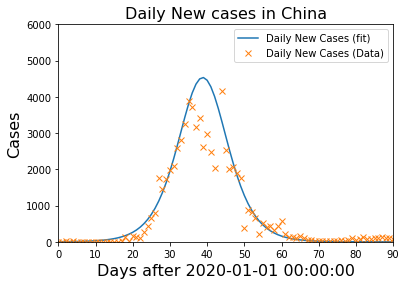

In [26]:
y=logistic_model(days,*popt)
plt.plot(np.diff(y),label='Daily New Cases (fit)')
days = np.arange(df_c['DT'].size)
plt.plot(days,df_c['DailyCases'],'x',label='Daily New Cases (Data)')
plt.legend()
plt.xlabel('Days after '+ str(date_zero),fontsize=16)
plt.ylabel('Cases',fontsize=16)
plt.title('Daily New cases in '+ C,fontsize=16)
plt.xlim([0,90])
plt.ylim([0,6000])
plt.show()

In [27]:
fn = '../Datasets/total-and-daily-cases-covid-19.csv'

df = pd.read_csv(fn) 

# first change the column names slightly
df.rename(columns={'Total confirmed cases (cases)':'TotalCases','Daily new confirmed cases (cases)':'DailyCases'},\
          inplace=True)

# now let's convert the date strings to datetime object by adding a new column 'DT' 
df['DT']=pd.to_datetime(df.Date)
df.tail()

,Entity,Code,Date,TotalCases,DailyCases,DT
8190,Zimbabwe,ZWE,"Mar 28, 2020",5,2,2020-03-28
8191,Zimbabwe,ZWE,"Mar 29, 2020",7,2,2020-03-29
8192,Zimbabwe,ZWE,"Mar 30, 2020",7,0,2020-03-30
8193,Zimbabwe,ZWE,"Mar 31, 2020",7,0,2020-03-31
8194,Zimbabwe,ZWE,"Apr 1, 2020",8,1,2020-04-01


## 4. Pie Chart?

Index(['Belgium', 'China', 'France', 'Germany', 'Iran', 'Italy', 'Netherlands',
       'Spain', 'Switzerland', 'United Kingdom', 'United States'],
      dtype='object', name='Entity')

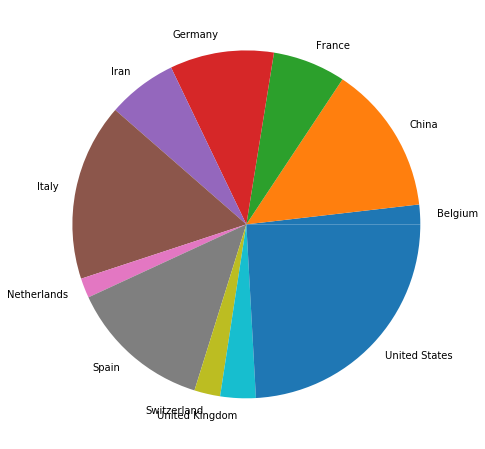

In [31]:
fn = '../Datasets/total-and-daily-cases-covid-19.csv'

df = pd.read_csv(fn,index_col=0) 

# first change the column names slightly
df.rename(columns={'Total confirmed cases (cases)':'TotalCases','Daily new confirmed cases (cases)':'DailyCases'},\
          inplace=True)


date_zero = datetime.strptime('2020-3-30','%Y-%m-%d') # starting time, datetime object
df['DT']=pd.to_datetime(df.Date)

plt.figure(figsize=(8,8))

temp = df.drop(index='World')
temp = temp[temp.TotalCases>10000]
names = temp[temp.DT == date_zero].index
plt.pie(temp.TotalCases[temp.DT == date_zero],labels = names) # filter the data 
#plt.show()
names


Doesn't look particularly useful